In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"E:\elevatetrsest\crop price predictor\Crop_price_Prediction\data\wheat_price(2020-23).csv")

In [4]:
df.head()

date  district_id district_name commodity_name   state_name  \
0  2023-12-29          497     Nandurbar          Wheat  Maharashtra   
1  2023-12-28          497     Nandurbar          Wheat  Maharashtra   
2  2023-12-27          497     Nandurbar          Wheat  Maharashtra   
3  2023-12-26          497     Nandurbar          Wheat  Maharashtra   
4  2023-12-22          497     Nandurbar          Wheat  Maharashtra   

   avg_modal_price  avg_min_price  avg_max_price calculationType  change  
0          2408.67         2297.0         2550.0           Daily  -49.83  
1          2458.50         2392.0         2492.0           Daily   58.50  
2          2400.00         2311.0         2500.0           Daily  300.00  
3          2100.00         2100.0         2100.0           Daily -575.00  
4          2675.00         2350.0         3021.0           Daily  175.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29622 entries, 0 to 29621
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             29622 non-null  object 
 1   district_id      29622 non-null  int64  
 2   district_name    29622 non-null  object 
 3   commodity_name   29622 non-null  object 
 4   state_name       29622 non-null  object 
 5   avg_modal_price  29622 non-null  float64
 6   avg_min_price    29620 non-null  float64
 7   avg_max_price    29622 non-null  float64
 8   calculationType  29622 non-null  object 
 9   change           29591 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [6]:
df.dropna()

date  district_id district_name commodity_name   state_name  \
0      2023-12-29          497     Nandurbar          Wheat  Maharashtra   
1      2023-12-28          497     Nandurbar          Wheat  Maharashtra   
2      2023-12-27          497     Nandurbar          Wheat  Maharashtra   
3      2023-12-26          497     Nandurbar          Wheat  Maharashtra   
4      2023-12-22          497     Nandurbar          Wheat  Maharashtra   
...           ...          ...           ...            ...          ...   
29616  2020-01-06          505        Nagpur          Wheat  Maharashtra   
29617  2020-01-05          505        Nagpur          Wheat  Maharashtra   
29618  2020-01-04          505        Nagpur          Wheat  Maharashtra   
29619  2020-01-03          505        Nagpur          Wheat  Maharashtra   
29620  2020-01-02          505        Nagpur          Wheat  Maharashtra   

       avg_modal_price  avg_min_price  avg_max_price calculationType  change  
0              2408.67        2297.00        2550.00           Daily  -49.83  
1              2458.50        2392.00        2492.00           Daily   58.50  
2              2400.00        2311.00        2500.00           Daily  300.00  
3              2100.00        2100.00        2100.00           Daily -575.00  
4              2675.00        2350.00        3021.00           Daily  175.00  
...                ...            ...            ...             ...     ...  
29616          2360.50        2285.50        2385.50           Daily  280.50  
29617          2080.00        2051.00        2170.00           Daily -336.00  
29618          2416.00        2300.00        2455.00           Daily  100.50  
29619          2315.50        2225.50        2380.00           Daily    9.50  
29620          2306.00        2133.33        2463.33           Daily  -51.50  

[29589 rows x 10 columns]

In [7]:

df['date_n'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.drop('date', axis=1, inplace=True)
df['date'] = df['date_n']
df.drop('date_n', axis=1, inplace=True)

In [8]:
df.fillna('interpolate' , inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\3638646384.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'interpolate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('interpolate' , inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29622 entries, 0 to 29621
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_id      29622 non-null  int64  
 1   district_name    29622 non-null  object 
 2   commodity_name   29622 non-null  object 
 3   state_name       29622 non-null  object 
 4   avg_modal_price  29622 non-null  float64
 5   avg_min_price    29622 non-null  object 
 6   avg_max_price    29622 non-null  float64
 7   calculationType  29622 non-null  object 
 8   change           29622 non-null  object 
 9   month            29622 non-null  int32  
 10  year             29622 non-null  int32  
 11  date             29622 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(6)
memory usage: 2.4+ MB


In [10]:
columns = ['district_name' , 'commodity_name' , 'state_name']

for col in columns:
    frequency_encoding = df[col].value_counts()
    df[f'{col}_enc'] = df[col].map(frequency_encoding)

df.drop(columns=columns , axis=1 , inplace=True)
df.drop(columns=['calculationType' , 'district_id' , 'change'] , axis=1 , inplace=True)

In [11]:
df.head()

avg_modal_price avg_min_price  avg_max_price  month  year  date  \
0          2408.67        2297.0         2550.0     12  2023    29   
1          2458.50        2392.0         2492.0     12  2023    28   
2          2400.00        2311.0         2500.0     12  2023    27   
3          2100.00        2100.0         2100.0     12  2023    26   
4          2675.00        2350.0         3021.0     12  2023    22   

   district_name_enc  commodity_name_enc  state_name_enc  
0                953               29622           29622  
1                953               29622           29622  
2                953               29622           29622  
3                953               29622           29622  
4                953               29622           29622

In [12]:
# Replace invalid values with NaN
df['avg_min_price'] = pd.to_numeric(df['avg_min_price'], errors='coerce')

# Convert the column to Float64
df['avg_min_price'] = df['avg_min_price'].astype('float64')

# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29622 entries, 0 to 29621
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_modal_price     29622 non-null  float64
 1   avg_min_price       29620 non-null  float64
 2   avg_max_price       29622 non-null  float64
 3   month               29622 non-null  int32  
 4   year                29622 non-null  int32  
 5   date                29622 non-null  int32  
 6   district_name_enc   29622 non-null  int64  
 7   commodity_name_enc  29622 non-null  int64  
 8   state_name_enc      29622 non-null  int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.7 MB


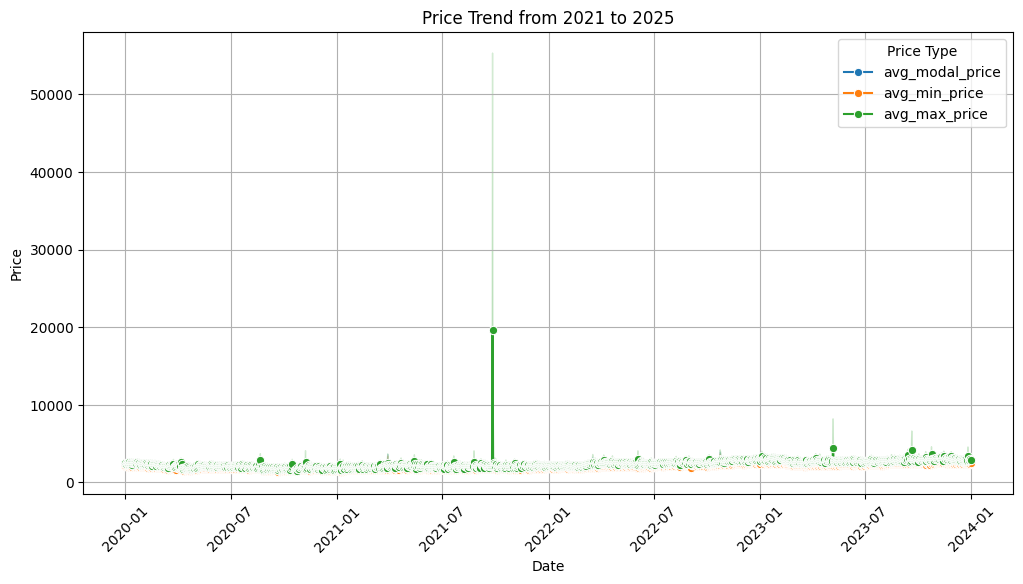

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Rename 'date' column to 'day' for compatibility with pd.to_datetime
df.rename(columns={'date': 'day'}, inplace=True)

# Create a datetime column using year, month, and day
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame for Seaborn, using 'datetime' as the id variable
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Plot the price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')
plt.title("Price Trend from 2021 to 2025")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df = df.dropna()  # or df.fillna(method='ffill') depending on your case
df = remove_outliers_iqr(df)

df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
29621          2357.50        2282.50        2382.50      1  2020    1   
17424          2270.00        2172.00        2359.62      1  2020    1   
23853          2011.86        1937.00        2124.71      1  2020    1   
10359          2207.88        2028.12        2363.88      1  2020    1   
28321          2090.00        2040.00        2175.00      1  2020    1   

       district_name_enc  commodity_name_enc  state_name_enc   datetime  
29621               1300               29622           29622 2020-01-01  
17424               1388               29622           29622 2020-01-01  
23853               1143               29622           29622 2020-01-01  
10359               1172               29622           29622 2020-01-01  
28321               1050               29622           29622 2020-01-01

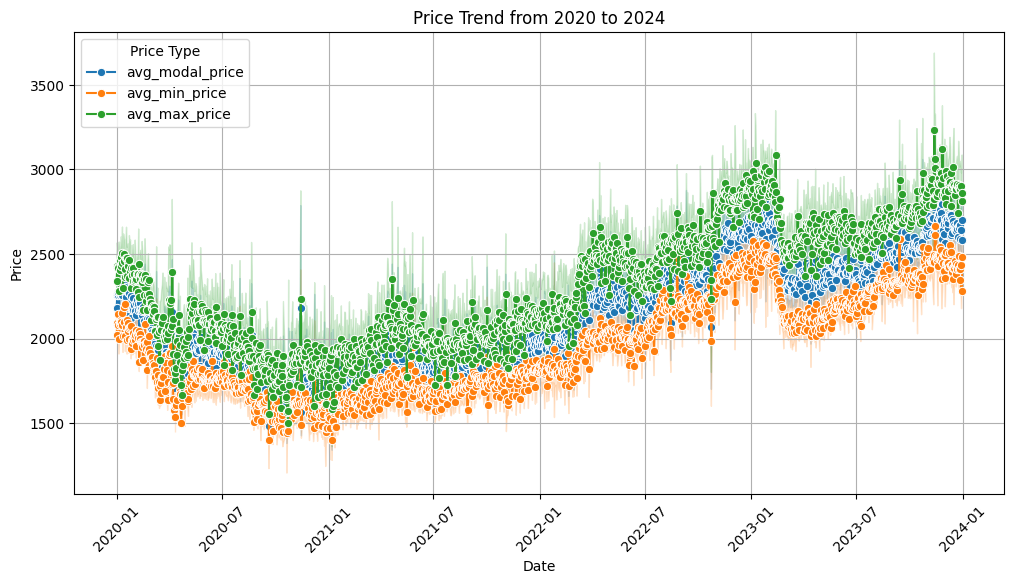

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Rename 'date' column to 'day' for compatibility with pd.to_datetime
df.rename(columns={'date': 'day'}, inplace=True)

# Create a datetime column using year, month, and day
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame for Seaborn, using 'datetime' as the id variable
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Plot the price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')
plt.title("Price Trend from 2020 to 2024")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import plotly.express as px

# Assuming df is already defined with the appropriate columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Create a datetime column using year, month, and date
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame to long format for plotting
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Create an interactive line plot with Plotly Express
fig = px.line(df_melted, x='datetime', y='Price', color='Price Type', markers=True,
              title="Price Trend from 2021 to 2025")

fig.update_layout(xaxis_title="Date", yaxis_title="Price")
fig.show()


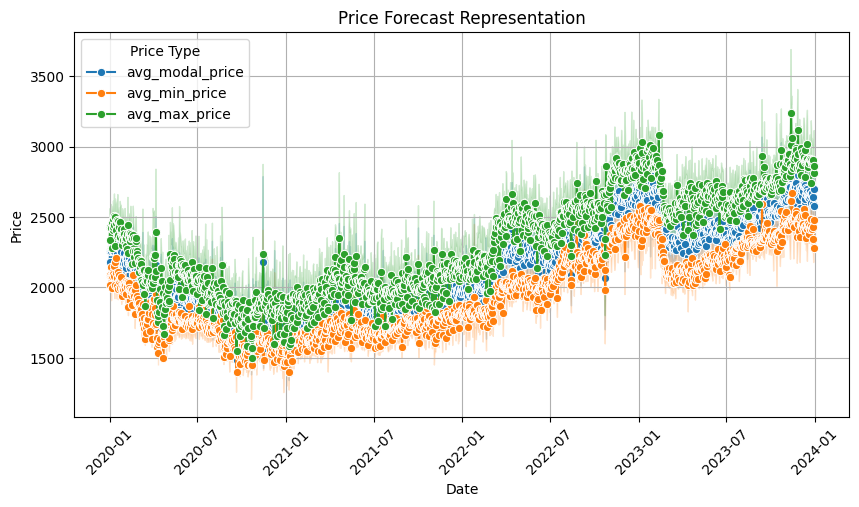

In [17]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars=['datetime'], value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                     var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')

plt.title("Price Forecast Representation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()

In [18]:
import pandas as pd

# --- Safe Time-based Features ---
# Create datetime index (safe - no leakage)
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str),
    errors='coerce'
)

# Extract quarter from date (safe)
df['quarter'] = df['date_parsed'].dt.quarter

# Time trend (safe if created sequentially)
df = df.sort_values('date_parsed')
df['time_trend'] = range(len(df))

# --- Removed All Price-Based Features ---
# Removed: price_spread (uses target variables)
# Removed: modal_deviation (uses target variables)
# Removed: modal_price_lag1 (uses target variable)
# Removed: rolling_modal_mean (uses target variable)
# Removed: all district/commodity aggregates (use target variable)

# --- Final Features That Are Safe ---
# Only keeping features that can be created from the input you'll provide:
# year, month, day, quarter, time_trend (from date)
# plus the categorical encodings:
# district_name_enc, commodity_name_enc, state_name_enc

# Final feature set that matches your prediction pipeline requirements
safe_features = [
    'year', 'month', 'day', 'quarter', 'time_trend',
    'district_name_enc', 'commodity_name_enc', 'state_name_enc'
]

print("Adjusted feature engineering complete. Safe features:")
print(safe_features)

Adjusted feature engineering complete. Safe features:
['year', 'month', 'day', 'quarter', 'time_trend', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']


### feature engineering

In [19]:
df.fillna(method='bfill')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\2831856154.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
29621          2357.50        2282.50        2382.50      1  2020    1   
18539          2149.67        2083.33        2225.00      1  2020    1   
27271          2148.00        1987.50        2308.75      1  2020    1   
12726          2107.60        1871.40        2302.80      1  2020    1   
25098          2700.00        1925.00        2900.00      1  2020    1   
...                ...            ...            ...    ...   ...  ...   
7773           2850.00        2660.00        2995.50     12  2023   31   
28322          2600.00        2500.00        2700.00     12  2023   31   
14693          2500.00        2200.00        2725.00     12  2023   31   
10360          3250.00        3000.00        3500.00     12  2023   31   
16037          2800.00        2500.00        2800.00     12  2023   31   

       district_name_enc  commodity_name_enc  state_name_enc   datetime  \
29621               1300               29622           29622 2020-01-01   
18539               1115               29622           29622 2020-01-01   
27271               1131               29622           29622 2020-01-01   
12726               1202               29622           29622 2020-01-01   
25098               1245               29622           29622 2020-01-01   
...                  ...                 ...             ...        ...   
7773                1415               29622           29622 2023-12-31   
28322               1300               29622           29622 2023-12-31   
14693               1344               29622           29622 2023-12-31   
10360               1165               29622           29622 2023-12-31   
16037               1388               29622           29622 2023-12-31   

      date_parsed  quarter  time_trend  
29621  2020-01-01        1           0  
18539  2020-01-01        1           1  
27271  2020-01-01        1           2  
12726  2020-01-01        1           3  
25098  2020-01-01        1           4  
...           ...      ...         ...  
7773   2023-12-31        4       27852  
28322  2023-12-31        4       27853  
14693  2023-12-31        4       27854  
10360  2023-12-31        4       27855  
16037  2023-12-31        4       27856  

[27857 rows x 13 columns]

In [20]:
df.drop(columns='date_parsed' , inplace=True)

In [21]:

df = df.dropna(subset=['avg_min_price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27857 entries, 29621 to 16037
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   avg_modal_price     27857 non-null  float64       
 1   avg_min_price       27857 non-null  float64       
 2   avg_max_price       27857 non-null  float64       
 3   month               27857 non-null  int32         
 4   year                27857 non-null  int32         
 5   day                 27857 non-null  int32         
 6   district_name_enc   27857 non-null  int64         
 7   commodity_name_enc  27857 non-null  int64         
 8   state_name_enc      27857 non-null  int64         
 9   datetime            27857 non-null  datetime64[ns]
 10  quarter             27857 non-null  int32         
 11  time_trend          27857 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(4)
memory usage: 2.3 MB


single target - avg_modal_price model

In [91]:
df = df.rename(columns={'date': 'day'})

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split

# Feature Engineering
X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df['avg_modal_price']  # Target variable

# # Temporal train-test split (80-20 split)
# split_date = df['date'].iloc[int(len(df)*0.8)]
# X_train = X[X['date'] <= split_date]
# X_test = X[X['date'] > split_date]

# y_train = y[X['date'] <= split_date]
# y_test = y[X['date'] > split_date]

X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)



# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(f"R2: {r2_score(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Feature Importance
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Example prediction function
def predict_price( month, year,date, district, commodity, state):
    input_data = pd.DataFrame({
        'month': [month],
        'year': [year],
        'day': [date],
        'district_name_enc': [district],
        'commodity_name_enc': [commodity],
        'state_name_enc': [state]
    })
    
    input_data = input_data.drop('date', axis=1)
    return model.predict(input_data)[0]

# Example usage:
# predicted_price = predict_price(15, 3, 2024, 30501, 30501, 981)
# print(f"Predicted Price: {predicted_price}")

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
from skopt.space import Real, Integer, Categorical

# Bayesian Optimization search space
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 0.5),
    'n_estimators': Integer(100, 1000)
}
# XGBoost model template
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=50,
    random_state=42
)
# Bayesian Optimizer
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,  # Number of optimization steps
    cv=3,  # Use time series split in practice
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Fit with Bayesian Optimization
opt.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

# Best model
best_model = opt.best_estimator_

# Evaluation
predictions = best_model.predict(X_test)
print(f"Optimized MAE: {mean_absolute_error(y_test, predictions)}")
print(f"Optimized r2: {r2_score(y_test, predictions)}")
print(f"Optimized RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Show best parameters
print("\nBest Parameters:")
for param, value in opt.best_params_.items():
    print(f"{param}: {value}")

# Feature Importance (using optimized model)
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

Enhanced Multi-Target Regression 

In [23]:
df=df.dropna()

In [24]:
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']].fillna(np.nan).astype(float)
X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']].fillna(np.nan).astype(float)

## enhanced version

In [26]:
df_raw = pd.read_csv(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\data\edited_20_23.csv')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\1214443253.py:47: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\1214443253.py:64: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Training data shape: X=(22264, 16), y=(22264, 3)
Testing data shape: X=(5566, 16), y=(5566, 3)
Training data period: 1970-01-01 00:00:00.000000001 to 1970-01-01 00:00:00.000000025
Testing data period: 1970-01-01 00:00:00.000000025 to 1970-01-01 00:00:00.000000031

Starting Bayesian Optimization for Hyperparameters...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 ca

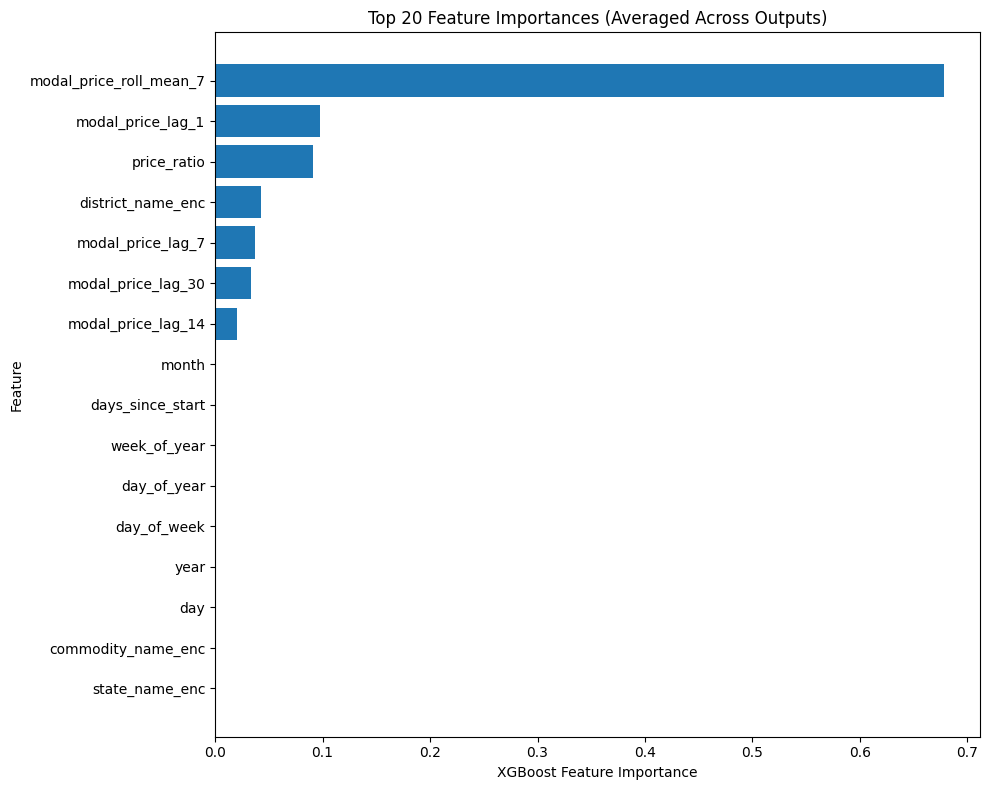

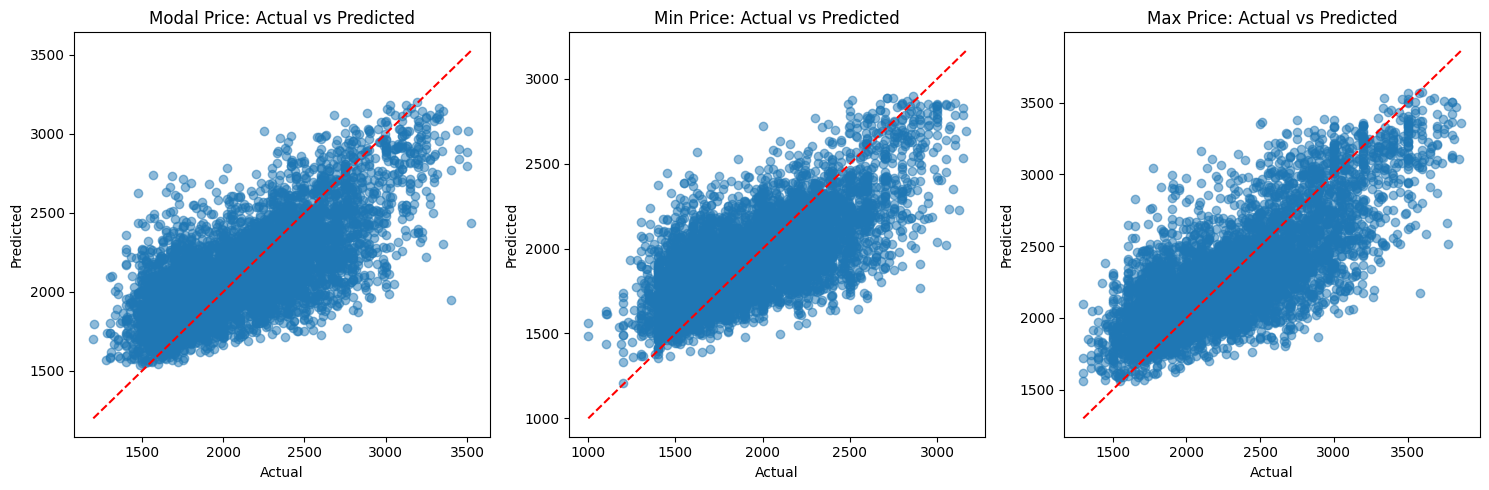

In [27]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
import xgboost as xgb
from skopt import BayesSearchCV
import matplotlib.pyplot as plt # For plotting results

# --- 1. Load and Prepare Data ---
# Assume 'df_raw' is your initially loaded DataFrame
# Example: df_raw = pd.read_csv('your_data.csv')
# Make sure the date column is parsed correctly
# df_raw['date'] = pd.to_datetime(df_raw['date'])

# Create a copy to avoid modifying the original raw data
df = df_raw.copy()

# --- Ensure Correct DateTime ---
# If 'date' column isn't datetime yet, convert it
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# Sort by date - CRUCIAL for time series features and splitting
df.sort_values(by='date', inplace=True)
df.reset_index(drop=True, inplace=True) # Reset index after sorting

# --- 2. Feature Engineering ---

# a) Basic Date Features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

# b) Temporal Features relative to dataset start
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# c) Price Ratio (handle potential division by zero)
# Use np.where to avoid division by zero if min_price can be 0
df['price_ratio'] = np.where(
    df['avg_min_price'] != 0, df['avg_max_price'] / df['avg_min_price'], 0
)
# Handle potential inf values if max_price exists and min_price is 0
df['price_ratio'].replace([np.inf, -np.inf], 0, inplace=True)


# d) Lag Features (Modal Price) - Grouped by district & commodity
lag_periods = [1, 7, 14, 30] # Added 14-day lag
lagged_columns = []
for lag in lag_periods:
    col_name = f'modal_price_lag_{lag}'
    df[col_name] = df.groupby(['district_name', 'commodity_name'])['avg_modal_price'].shift(lag)
    lagged_columns.append(col_name)

# Handle NaNs created by shift using forward fill WITHIN groups first
# Then fill any remaining NaNs (start of groups) with 0 or group mean/median
for col in lagged_columns:
     # Forward fill within each group
     df[col] = df.groupby(['district_name', 'commodity_name'])[col].ffill()
     # Fill remaining NaNs (usually at the start of each group) with 0
     df[col].fillna(0, inplace=True)
     # Ensure float type
     df[col] = df[col].astype(float)


# e) Rolling Window Features (Example: 7-day rolling mean of modal price)
window_size = 7
roll_col_name = f'modal_price_roll_mean_{window_size}'
# Calculate rolling mean within groups, handling initial periods
# min_periods=1 ensures output even if window isn't full
df[roll_col_name] = df.groupby(['district_name', 'commodity_name'])['avg_modal_price'] \
                      .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
df[roll_col_name].fillna(0, inplace=True) # Fill any potential NaNs (e.g., if group is too small)
df[roll_col_name] = df[roll_col_name].astype(float)


# f) Frequency Encoding (apply AFTER grouping features are created)
categorical_cols = ['district_name', 'commodity_name', 'state_name']
encoded_cols = []
for col in categorical_cols:
    freq_map = df[col].value_counts().to_dict()
    enc_col_name = f'{col}_enc'
    df[enc_col_name] = df[col].map(freq_map)
    df[enc_col_name].fillna(1, inplace=True) # Handle potential unseen values if applying on new data later
    df[enc_col_name] = df[enc_col_name].astype(int)
    encoded_cols.append(enc_col_name)

# --- 3. Define Features (X) and Target (y) ---
feature_columns = [
    'month', 'year', 'day', 'day_of_week', 'day_of_year', 'week_of_year',
    'days_since_start',
    'price_ratio',
    roll_col_name # Add rolling mean feature
] + lagged_columns + encoded_cols # Add lags and encoded categoricals

# Ensure all selected feature columns exist in df
missing_cols = [col for col in feature_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing feature columns after engineering: {missing_cols}")

X = df[feature_columns]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

# --- 4. Time-Based Train-Test Split ---
# Split data sequentially, not randomly
test_size_ratio = 0.20 # 20% for test set
n_total = len(df)
n_test = int(n_total * test_size_ratio)
n_train = n_total - n_test

X_train = X.iloc[:n_train]
y_train = y.iloc[:n_train]
X_test = X.iloc[n_train:]
y_test = y.iloc[n_train:]

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")
print(f"Training data period: {df.loc[X_train.index, 'date'].min()} to {df.loc[X_train.index, 'date'].max()}")
print(f"Testing data period: {df.loc[X_test.index, 'date'].min()} to {df.loc[X_test.index, 'date'].max()}")


# --- 5. Model Training Setup ---

# Define search space including regularization
search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 10), # Slightly reduced max_depth range
    'estimator__subsample': (0.6, 0.9), # Slightly reduced subsample range
    'estimator__colsample_bytree': (0.6, 0.9), # Slightly reduced colsample range
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1500), # Increased max estimators
    'estimator__reg_alpha': (0.0, 1.0, 'uniform'), # L1 regularization
    'estimator__reg_lambda': (0.5, 2.0, 'uniform'), # L2 regularization - start > 0
    'estimator__min_child_weight': (1, 10) # Added min_child_weight
}

# Custom scorer for multioutput R2
def multioutput_r2_score(y_true, y_pred):
     # Ensure input is numpy array
     y_true_np = np.asarray(y_true)
     y_pred_np = np.asarray(y_pred)
     # Check for NaNs or Infs in predictions which can cause errors
     if np.any(np.isnan(y_pred_np)) or np.any(np.isinf(y_pred_np)):
          return -np.inf # Return a very bad score if prediction is invalid
     scores = []
     for i in range(y_true_np.shape[1]):
         try:
             score = r2_score(y_true_np[:, i], y_pred_np[:, i])
             scores.append(score)
         except Exception:
             scores.append(-np.inf) # Penalize if r2 fails for a target
     return np.mean(scores) if scores else -np.inf


custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Base XGBoost model
xgb_base = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist', # Generally faster for larger datasets
    random_state=42,
    n_jobs=-1 # Use all available cores within XGBoost itself
)

# MultiOutput Regressor wrapping XGBoost
model = MultiOutputRegressor(estimator=xgb_base, n_jobs=1) # Run estimators sequentially if needed for memory

# TimeSeriesSplit for cross-validation within BayesSearch
# Ensure gap=0 if your data points are consecutive days you want to predict immediately
# Increase n_splits for more robust validation
tscv = TimeSeriesSplit(n_splits=5, gap=0) # test_size can also be set

# Bayesian Optimization Search
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=50, # Adjust n_iter based on available time (50-150 is common)
    cv=tscv,
    scoring=custom_scorer,
    n_jobs=-1, # Use multiple cores for CV folds/trials (-1 for all)
    verbose=3, # Increased verbosity
    random_state=42,
    return_train_score=True # To check for overfitting during CV
)

print("\nStarting Bayesian Optimization for Hyperparameters...")
# Fit using the training data (pass as numpy arrays for consistency)
# Note: BayesSearchCV handles the MultiOutput aspect via the estimator
opt.fit(X_train.values, y_train.values)
print("Finished Bayesian Optimization.")

# --- 6. Evaluation ---
print(f"\nBest parameters found: {opt.best_params_}")
print(f"Best cross-validation R² score: {opt.best_score_:.4f}")

# Get the best estimator found by the search
best_model = opt.best_estimator_

# Predict on the time-based test set
print("\nPredicting on the test set...")
predictions = best_model.predict(X_test.values)

# Calculate R² score on the test set
test_r2 = r2_score(y_test, predictions)
print(f"Test Set R² Score (Overall): {test_r2:.4f}")

# Calculate R² for each target variable individually
r2_modal = r2_score(y_test['avg_modal_price'], predictions[:, 0])
r2_min = r2_score(y_test['avg_min_price'], predictions[:, 1])
r2_max = r2_score(y_test['avg_max_price'], predictions[:, 2])
print(f"Test Set R² Score (Modal): {r2_modal:.4f}")
print(f"Test Set R² Score (Min): {r2_min:.4f}")
print(f"Test Set R² Score (Max): {r2_max:.4f}")

# Calculate other metrics like RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test Set RMSE (Overall): {rmse:.2f}")

# --- 7. Optional: Plot Feature Importances ---
try:
    # Feature importances are stored in each individual estimator of MultiOutputRegressor
    if hasattr(best_model, 'estimators_'):
        # Assuming all estimators are the same type (XGBoost)
        # Aggregate importances (e.g., average) across estimators
        importances = np.mean([est.feature_importances_ for est in best_model.estimators_], axis=0)
        feature_names = X_train.columns

        importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        importance_df = importance_df.sort_values('importance', ascending=False).head(20) # Top 20

        plt.figure(figsize=(10, 8))
        plt.barh(importance_df['feature'], importance_df['importance'])
        plt.xlabel("XGBoost Feature Importance")
        plt.ylabel("Feature")
        plt.title("Top 20 Feature Importances (Averaged Across Outputs)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"\nCould not plot feature importances: {e}")

# --- 8. Optional: Plot Predictions vs Actuals for Test Set ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test['avg_modal_price'], predictions[:, 0], alpha=0.5)
plt.plot([y_test['avg_modal_price'].min(), y_test['avg_modal_price'].max()], [y_test['avg_modal_price'].min(), y_test['avg_modal_price'].max()], 'r--')
plt.title('Modal Price: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test['avg_min_price'], predictions[:, 1], alpha=0.5)
plt.plot([y_test['avg_min_price'].min(), y_test['avg_min_price'].max()], [y_test['avg_min_price'].min(), y_test['avg_min_price'].max()], 'r--')
plt.title('Min Price: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test['avg_max_price'], predictions[:, 2], alpha=0.5)
plt.plot([y_test['avg_max_price'].min(), y_test['avg_max_price'].max()], [y_test['avg_max_price'].min(), y_test['avg_max_price'].max()], 'r--')
plt.title('Max Price: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

## validating on 2024 dataset

In [37]:
df_raw = pd.read_csv(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\notebooks\edited_20_23.csv')
df_test = pd.read_csv(r'E:\elevatetrsest\crop price predictor\Crop_price_Prediction\notebooks\test_edited_24.csv')

Preprocessing 2024 test data...
Preprocessing complete.

Predicting on 2024 data (shape: (6510, 16))...
Prediction complete.

--- Evaluation on 2024 Test Data ---
Overall R² Score (2024): 0.2336
  R² Score (Modal): 0.2000
  R² Score (Min):   0.2025
  R² Score (Max):   0.2984

Overall RMSE (2024): 292.20
  RMSE (Modal): 285.91
  RMSE (Min):   278.52
  RMSE (Max):   311.17

Generating comparison plots for 2024 data...


C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\3029871771.py:66: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\3029871771.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

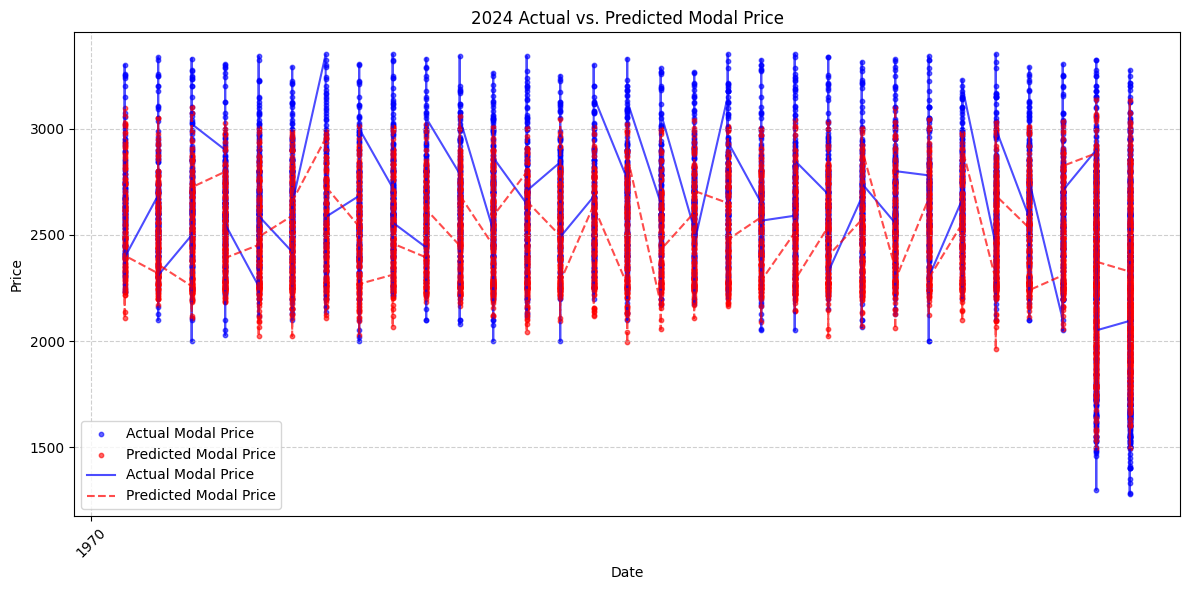

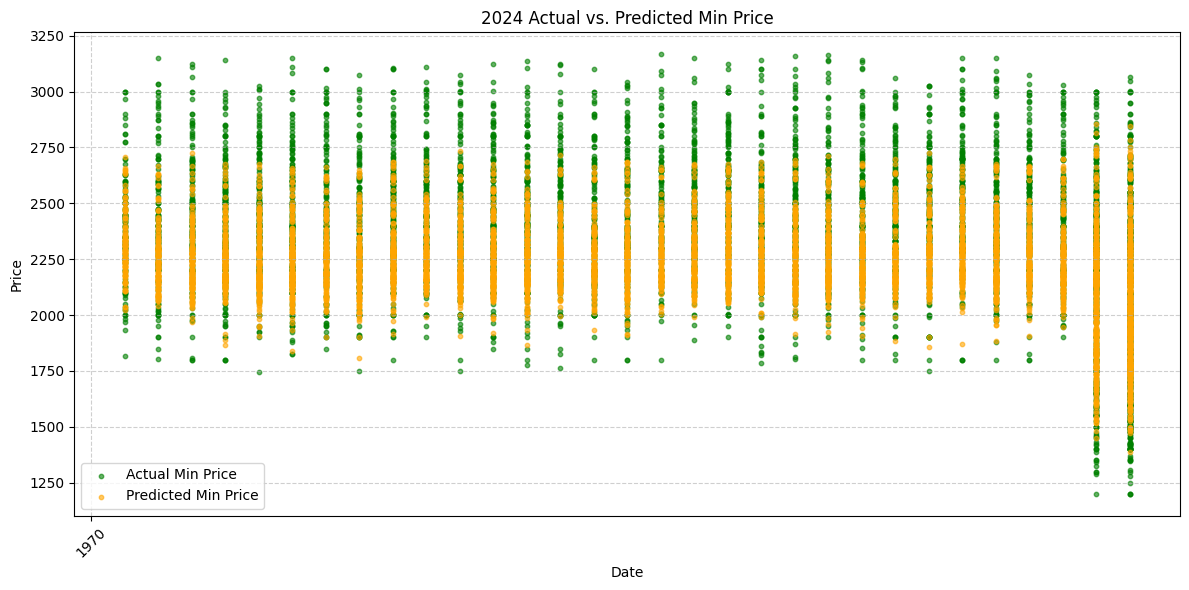

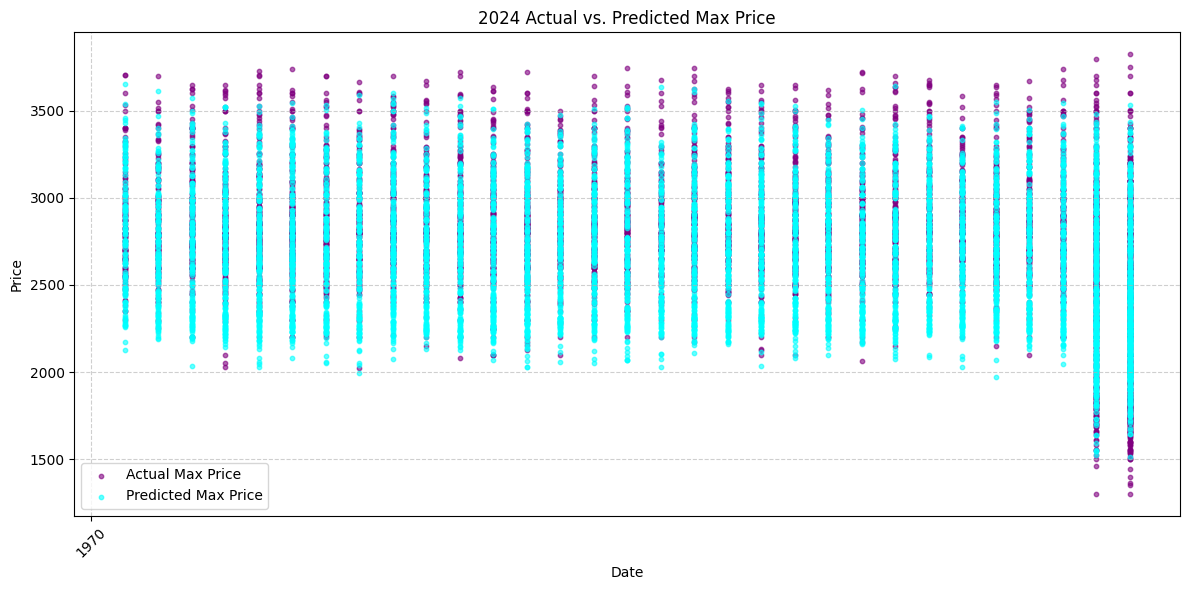


--- Analysis Complete ---


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle # To load the model if not already in memory
import seaborn as sns

# --- Configuration & Assumptions ---

# Assume 'best_model' is the trained MultiOutputRegressor(XGBRegressor)
# from the previous training step. If not, load it:
# Example:
# with open('wheat_model_final.pkl', 'rb') as f:
#     best_model = pickle.load(f)

# Assume 'df_raw' is the DataFrame containing the original 2020-2023 data
# used for TRAINING the model. This is needed for context for lags/rolling
# features and for the frequency encoding maps.
# Example: 

df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw.sort_values(by='date', inplace=True)

# Assume 'df_test' is the DataFrame containing the 2024 data to test on.
# Example:

df_test['date'] = pd.to_datetime(df_test['date'])
df_test.sort_values(by='date', inplace=True)


# --- Re-use Feature Engineering Logic (adapted for test set) ---

# Define lag and window parameters used during training
lag_periods = [1, 7, 14, 30]
window_size = 7
max_lookback = max(max(lag_periods), window_size) # Max days needed from past

# Get frequency maps from the TRAINING data (df_raw)
freq_map_district = df_raw['district_name'].value_counts().to_dict()
freq_map_commodity = df_raw['commodity_name'].value_counts().to_dict()
freq_map_state = df_raw['state_name'].value_counts().to_dict()

def preprocess_data_for_prediction(df_new, df_history, max_lookback_days, freq_maps):
    """Applies the same preprocessing steps used during training."""
    # 1. Get recent history for lag/rolling features
    df_history_recent = df_history.iloc[-(max_lookback_days * len(df_history['district_name'].unique())):] # Approx lookback rows
    df_combined = pd.concat([df_history_recent, df_new], ignore_index=True)
    df_combined.sort_values(by='date', inplace=True)
    df_combined.reset_index(drop=True, inplace=True)

    # --- Apply same feature engineering as training ---
    # a) Basic Date Features
    df_combined['day'] = df_combined['date'].dt.day
    df_combined['month'] = df_combined['date'].dt.month
    df_combined['year'] = df_combined['date'].dt.year
    df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
    df_combined['day_of_year'] = df_combined['date'].dt.dayofyear
    df_combined['week_of_year'] = df_combined['date'].dt.isocalendar().week.astype(int)

    # b) Temporal Features relative to dataset start (use original training start date)
    df_combined['days_since_start'] = (df_combined['date'] - df_history['date'].min()).dt.days

    # c) Price Ratio
    df_combined['price_ratio'] = np.where(
        df_combined['avg_min_price'] != 0, df_combined['avg_max_price'] / df_combined['avg_min_price'], 0
    )
    df_combined['price_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # d) Lag Features
    lagged_columns_test = []
    for lag in lag_periods:
        col_name = f'modal_price_lag_{lag}'
        df_combined[col_name] = df_combined.groupby(['district_name', 'commodity_name'])['avg_modal_price'].shift(lag)
        lagged_columns_test.append(col_name)

    for col in lagged_columns_test:
        df_combined[col] = df_combined.groupby(['district_name', 'commodity_name'])[col].ffill()
        df_combined[col].fillna(0, inplace=True)
        df_combined[col] = df_combined[col].astype(float)

    # e) Rolling Window Features
    roll_col_name_test = f'modal_price_roll_mean_{window_size}'
    df_combined[roll_col_name_test] = df_combined.groupby(['district_name', 'commodity_name'])['avg_modal_price'] \
                                       .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    df_combined[roll_col_name_test].fillna(0, inplace=True)
    df_combined[roll_col_name_test] = df_combined[roll_col_name_test].astype(float)

    # f) Frequency Encoding (Using maps from TRAINING data)
    encoded_cols_test = []
    default_freq = 1 # Frequency for unseen categories in test set
    for col, fmap in freq_maps.items():
        enc_col_name = f'{col}_enc'
        df_combined[enc_col_name] = df_combined[col].map(lambda name: fmap.get(name, default_freq))
        df_combined[enc_col_name].fillna(default_freq, inplace=True) # Ensure no NaNs if .get fails unexpectedly
        df_combined[enc_col_name] = df_combined[enc_col_name].astype(int)
        encoded_cols_test.append(enc_col_name)
    # -----------------------------------------------------

    # 3. Filter back to only the new data rows (2024)
    # Find the index where the new data started in the combined frame
    # Assumes df_new's dates are strictly after df_history_recent
    first_new_date = df_new['date'].min()
    df_processed_new = df_combined[df_combined['date'] >= first_new_date].copy()

    return df_processed_new

# --- Prepare Test Data ---

print("Preprocessing 2024 test data...")
# Store frequency maps in a dictionary
frequency_maps = {
    'district_name': freq_map_district,
    'commodity_name': freq_map_commodity,
    'state_name': freq_map_state
}

# Apply the preprocessing function
df_test_processed = preprocess_data_for_prediction(df_test, df_raw, max_lookback, frequency_maps)
print("Preprocessing complete.")

# --- Define Features (X_2024) and Target (y_2024) ---

# Ensure feature_columns list matches EXACTLY the one used for training
# (Get it from the training script or define it here consistently)
feature_columns = [
    'month', 'year', 'day', 'day_of_week', 'day_of_year', 'week_of_year',
    'days_since_start',
    'price_ratio',
    f'modal_price_roll_mean_{window_size}' # Rolling mean feature name
] + [f'modal_price_lag_{lag}' for lag in lag_periods] \
  + [f'{col}_enc' for col in ['district_name', 'commodity_name', 'state_name']]

# Verify all columns exist in the processed test data
missing_cols_test = [col for col in feature_columns if col not in df_test_processed.columns]
if missing_cols_test:
    raise ValueError(f"Missing feature columns in processed 2024 data: {missing_cols_test}")

X_2024 = df_test_processed[feature_columns]
y_2024 = df_test_processed[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

# --- Predict on 2024 Data ---

print(f"\nPredicting on 2024 data (shape: {X_2024.shape})...")
# Ensure best_model is loaded and ready
if 'best_model' not in locals():
     raise NameError("'best_model' is not defined. Load the trained model first.")

predictions_2024 = best_model.predict(X_2024.values)
print("Prediction complete.")

# Add predictions back to the processed dataframe for easier plotting
df_test_processed['pred_modal_price'] = predictions_2024[:, 0]
df_test_processed['pred_min_price'] = predictions_2024[:, 1]
df_test_processed['pred_max_price'] = predictions_2024[:, 2]


# --- Evaluate Performance on 2024 Data ---

print("\n--- Evaluation on 2024 Test Data ---")

# Calculate R² score
test_r2_2024 = r2_score(y_2024, predictions_2024)
print(f"Overall R² Score (2024): {test_r2_2024:.4f}")

# Calculate R² for each target variable individually
r2_modal_2024 = r2_score(y_2024['avg_modal_price'], predictions_2024[:, 0])
r2_min_2024 = r2_score(y_2024['avg_min_price'], predictions_2024[:, 1])
r2_max_2024 = r2_score(y_2024['avg_max_price'], predictions_2024[:, 2])
print(f"  R² Score (Modal): {r2_modal_2024:.4f}")
print(f"  R² Score (Min):   {r2_min_2024:.4f}")
print(f"  R² Score (Max):   {r2_max_2024:.4f}")

# Calculate RMSE
rmse_2024 = np.sqrt(mean_squared_error(y_2024, predictions_2024))
rmse_modal_2024 = np.sqrt(mean_squared_error(y_2024['avg_modal_price'], predictions_2024[:, 0]))
rmse_min_2024 = np.sqrt(mean_squared_error(y_2024['avg_min_price'], predictions_2024[:, 1]))
rmse_max_2024 = np.sqrt(mean_squared_error(y_2024['avg_max_price'], predictions_2024[:, 2]))
print(f"\nOverall RMSE (2024): {rmse_2024:.2f}")
print(f"  RMSE (Modal): {rmse_modal_2024:.2f}")
print(f"  RMSE (Min):   {rmse_min_2024:.2f}")
print(f"  RMSE (Max):   {rmse_max_2024:.2f}")


# --- Plot Actual vs. Predicted for 2024 Data (Separate Plots) ---

print("\nGenerating comparison plots for 2024 data...")

# Plot 1: Modal Price
plt.figure(figsize=(12, 6))
plt.scatter(df_test_processed['date'], df_test_processed['avg_modal_price'], label='Actual Modal Price', alpha=0.6, s=10, c='blue')
plt.scatter(df_test_processed['date'], df_test_processed['pred_modal_price'], label='Predicted Modal Price', alpha=0.6, s=10, c='red')
# Optional: Plot lines instead or in addition
# plt.plot(df_test_processed['date'], df_test_processed['avg_modal_price'], label='Actual Modal Price', alpha=0.7, color='blue')
# plt.plot(df_test_processed['date'], df_test_processed['pred_modal_price'], label='Predicted Modal Price', alpha=0.7, linestyle='--', color='red')
plt.title('2024 Actual vs. Predicted Modal Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Min Price
plt.figure(figsize=(12, 6))
plt.scatter(df_test_processed['date'], df_test_processed['avg_min_price'], label='Actual Min Price', alpha=0.6, s=10, c='green')
plt.scatter(df_test_processed['date'], df_test_processed['pred_min_price'], label='Predicted Min Price', alpha=0.6, s=10, c='orange')
plt.title('2024 Actual vs. Predicted Min Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 3: Max Price
plt.figure(figsize=(12, 6))
plt.scatter(df_test_processed['date'], df_test_processed['avg_max_price'], label='Actual Max Price', alpha=0.6, s=10, c='purple')
plt.scatter(df_test_processed['date'], df_test_processed['pred_max_price'], label='Predicted Max Price', alpha=0.6, s=10, c='cyan')
plt.title('2024 Actual vs. Predicted Max Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n--- Analysis Complete ---")

Preprocessing 2024 test data...
Preprocessing complete.

Predicting on 2024 data (shape: (6510, 16))...
Prediction complete.

--- Evaluation on 2024 Test Data ---
Overall R² Score (2024): 0.2333
  R² Score (Modal): 0.1984
  R² Score (Min):   0.2024
  R² Score (Max):   0.2990

Overall RMSE (2024): 292.45
  RMSE (Modal): 286.39
  RMSE (Min):   278.66
  RMSE (Max):   311.31

Generating comparison plots for 2024 data...


C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\3367072464.py:69: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Shiva\AppData\Local\Temp\ipykernel_30844\3367072464.py:80: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

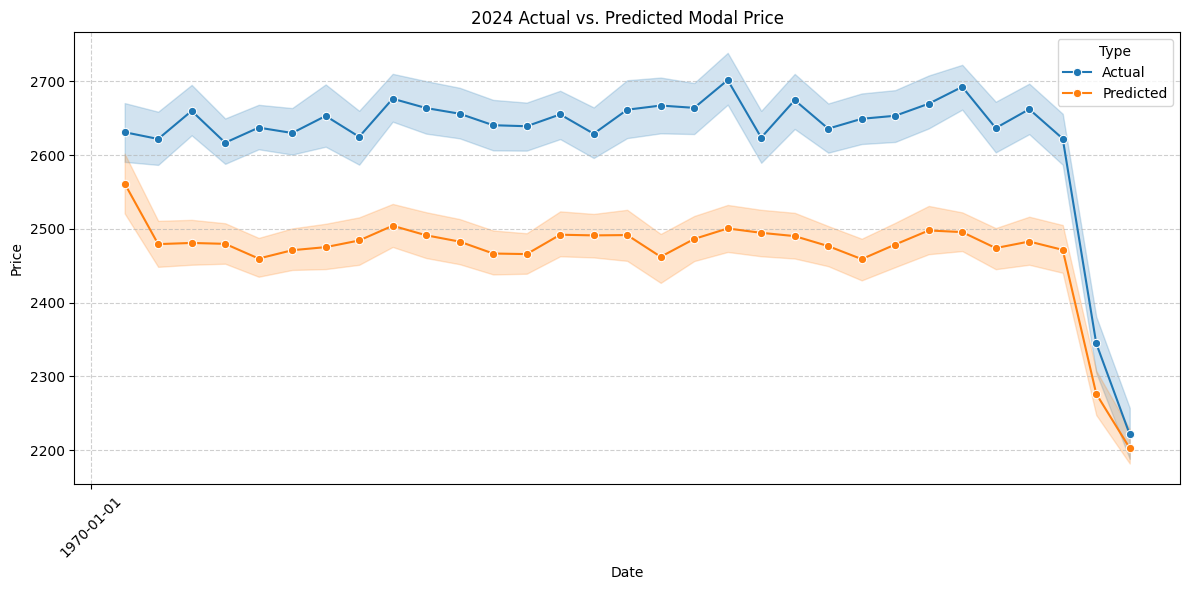

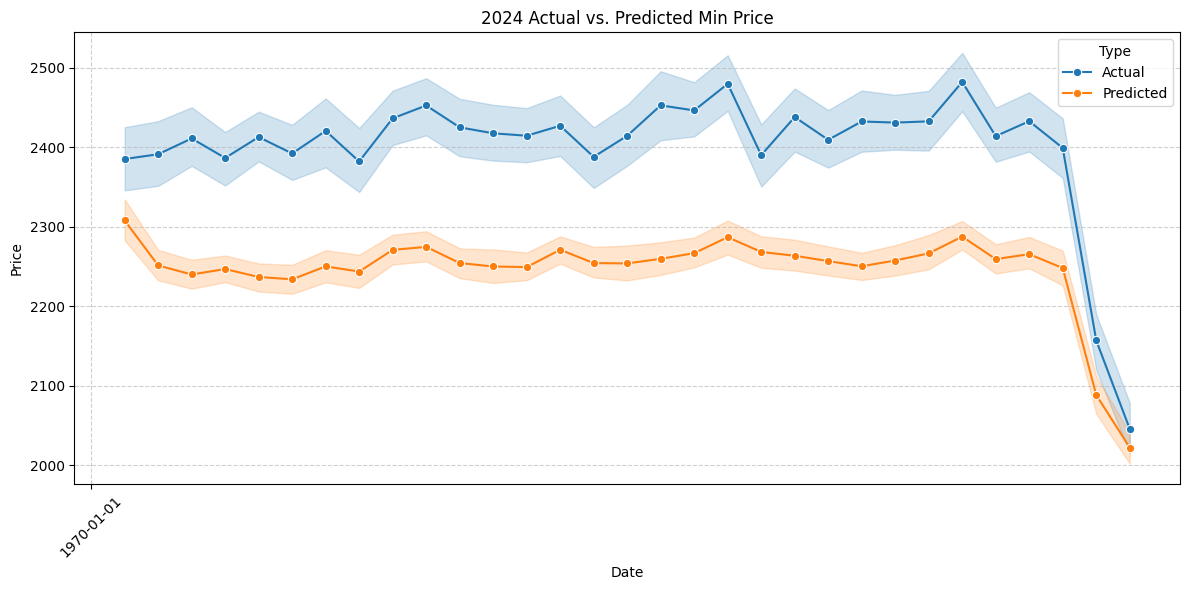

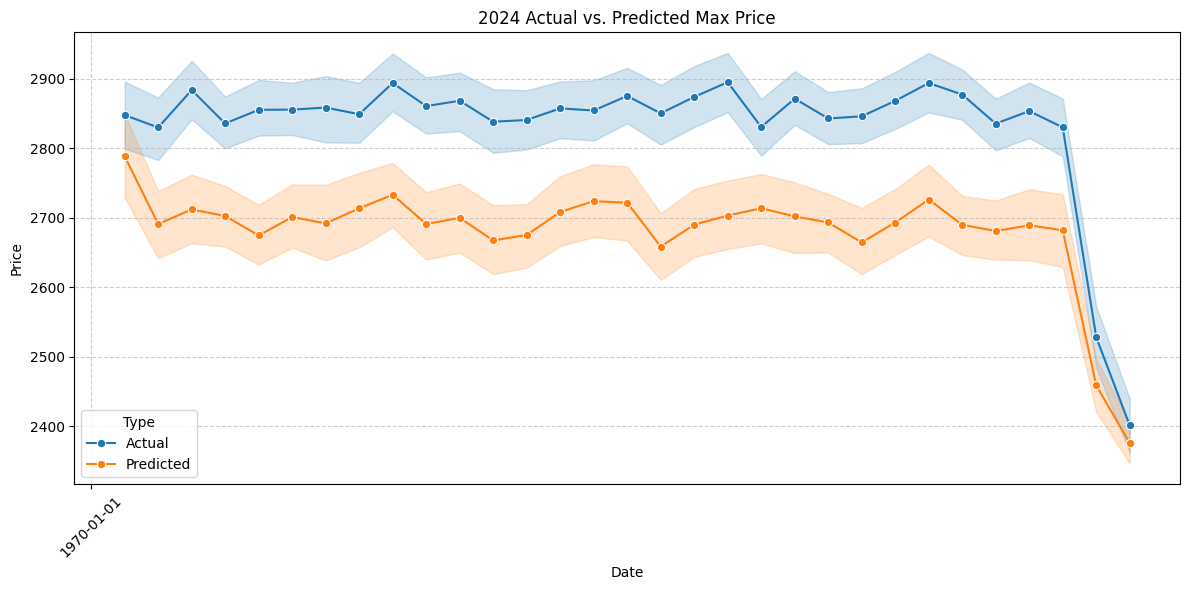


--- Analysis Complete ---


In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle # To load the model if not already in memory

import matplotlib.dates as mdates  # Import mdates for date formatting


# --- Configuration & Assumptions ---

# Assume 'best_model' is the trained MultiOutputRegressor(XGBRegressor)
# from the previous training step. If not, load it:
# Example:
# with open('wheat_model_final.pkl', 'rb') as f:
#     best_model = pickle.load(f)

# Assume 'df_raw' is the DataFrame containing the original 2020-2023 data
# used for TRAINING the model. This is needed for context for lags/rolling
# features and for the frequency encoding maps.
# Example: 

df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw.sort_values(by='date', inplace=True)

# Assume 'df_test' is the DataFrame containing the 2024 data to test on.
# Example:

df_test['date'] = pd.to_datetime(df_test['date'])
df_test.sort_values(by='date', inplace=True)


# --- Re-use Feature Engineering Logic (adapted for test set) ---

# Define lag and window parameters used during training
lag_periods = [1, 7, 14, 30]
window_size = 7
max_lookback = max(max(lag_periods), window_size) # Max days needed from past

# Get frequency maps from the TRAINING data (df_raw)
freq_map_district = df_raw['district_name'].value_counts().to_dict()
freq_map_commodity = df_raw['commodity_name'].value_counts().to_dict()
freq_map_state = df_raw['state_name'].value_counts().to_dict()

def preprocess_data_for_prediction(df_new, df_history, max_lookback_days, freq_maps):
    """Applies the same preprocessing steps used during training."""
    # 1. Get recent history for lag/rolling features
    df_history_recent = df_history.iloc[-(max_lookback_days * len(df_history['district_name'].unique())):] # Approx lookback rows
    df_combined = pd.concat([df_history_recent, df_new], ignore_index=True)
    df_combined.sort_values(by='date', inplace=True)
    df_combined.reset_index(drop=True, inplace=True)

    # --- Apply same feature engineering as training ---
    # a) Basic Date Features
    df_combined['day'] = df_combined['date'].dt.day
    df_combined['month'] = df_combined['date'].dt.month
    df_combined['year'] = df_combined['date'].dt.year
    df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
    df_combined['day_of_year'] = df_combined['date'].dt.dayofyear
    df_combined['week_of_year'] = df_combined['date'].dt.isocalendar().week.astype(int)

    # b) Temporal Features relative to dataset start (use original training start date)
    df_combined['days_since_start'] = (df_combined['date'] - df_history['date'].min()).dt.days

    # c) Price Ratio
    df_combined['price_ratio'] = np.where(
        df_combined['avg_min_price'] != 0, df_combined['avg_max_price'] / df_combined['avg_min_price'], 0
    )
    df_combined['price_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # d) Lag Features
    lagged_columns_test = []
    for lag in lag_periods:
        col_name = f'modal_price_lag_{lag}'
        df_combined[col_name] = df_combined.groupby(['district_name', 'commodity_name'])['avg_modal_price'].shift(lag)
        lagged_columns_test.append(col_name)

    for col in lagged_columns_test:
        df_combined[col] = df_combined.groupby(['district_name', 'commodity_name'])[col].ffill()
        df_combined[col].fillna(0, inplace=True)
        df_combined[col] = df_combined[col].astype(float)

    # e) Rolling Window Features
    roll_col_name_test = f'modal_price_roll_mean_{window_size}'
    df_combined[roll_col_name_test] = df_combined.groupby(['district_name', 'commodity_name'])['avg_modal_price'] \
                                       .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    df_combined[roll_col_name_test].fillna(0, inplace=True)
    df_combined[roll_col_name_test] = df_combined[roll_col_name_test].astype(float)

    # f) Frequency Encoding (Using maps from TRAINING data)
    encoded_cols_test = []
    default_freq = 1 # Frequency for unseen categories in test set
    for col, fmap in freq_maps.items():
        enc_col_name = f'{col}_enc'
        df_combined[enc_col_name] = df_combined[col].map(lambda name: fmap.get(name, default_freq))
        df_combined[enc_col_name].fillna(default_freq, inplace=True) # Ensure no NaNs if .get fails unexpectedly
        df_combined[enc_col_name] = df_combined[enc_col_name].astype(int)
        encoded_cols_test.append(enc_col_name)
    # -----------------------------------------------------

    # 3. Filter back to only the new data rows (2024)
    # Find the index where the new data started in the combined frame
    # Assumes df_new's dates are strictly after df_history_recent
    first_new_date = df_new['date'].min()
    df_processed_new = df_combined[df_combined['date'] >= first_new_date].copy()

    return df_processed_new

# --- Prepare Test Data ---

print("Preprocessing 2024 test data...")
# Store frequency maps in a dictionary
frequency_maps = {
    'district_name': freq_map_district,
    'commodity_name': freq_map_commodity,
    'state_name': freq_map_state
}

# Apply the preprocessing function
df_test_processed = preprocess_data_for_prediction(df_test, df_raw, max_lookback, frequency_maps)
print("Preprocessing complete.")

# --- Define Features (X_2024) and Target (y_2024) ---

# Ensure feature_columns list matches EXACTLY the one used for training
# (Get it from the training script or define it here consistently)
feature_columns = [
    'month', 'year', 'day', 'day_of_week', 'day_of_year', 'week_of_year',
    'days_since_start',
    'price_ratio',
    f'modal_price_roll_mean_{window_size}' # Rolling mean feature name
] + [f'modal_price_lag_{lag}' for lag in lag_periods] \
  + [f'{col}_enc' for col in ['district_name', 'commodity_name', 'state_name']]

# Verify all columns exist in the processed test data
missing_cols_test = [col for col in feature_columns if col not in df_test_processed.columns]
if missing_cols_test:
    raise ValueError(f"Missing feature columns in processed 2024 data: {missing_cols_test}")

X_2024 = df_test_processed[feature_columns]
y_2024 = df_test_processed[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

# --- Predict on 2024 Data ---

print(f"\nPredicting on 2024 data (shape: {X_2024.shape})...")
# Ensure best_model is loaded and ready
if 'best_model' not in locals():
     raise NameError("'best_model' is not defined. Load the trained model first.")

predictions_2024 = best_model.predict(X_2024.values)
print("Prediction complete.")

# Add predictions back to the processed dataframe for easier plotting
df_test_processed['pred_modal_price'] = predictions_2024[:, 0]
df_test_processed['pred_min_price'] = predictions_2024[:, 1]
df_test_processed['pred_max_price'] = predictions_2024[:, 2]


# --- Evaluate Performance on 2024 Data ---

print("\n--- Evaluation on 2024 Test Data ---")

# Calculate R² score
test_r2_2024 = r2_score(y_2024, predictions_2024)
print(f"Overall R² Score (2024): {test_r2_2024:.4f}")

# Calculate R² for each target variable individually
r2_modal_2024 = r2_score(y_2024['avg_modal_price'], predictions_2024[:, 0])
r2_min_2024 = r2_score(y_2024['avg_min_price'], predictions_2024[:, 1])
r2_max_2024 = r2_score(y_2024['avg_max_price'], predictions_2024[:, 2])
print(f"  R² Score (Modal): {r2_modal_2024:.4f}")
print(f"  R² Score (Min):   {r2_min_2024:.4f}")
print(f"  R² Score (Max):   {r2_max_2024:.4f}")

# Calculate RMSE
rmse_2024 = np.sqrt(mean_squared_error(y_2024, predictions_2024))
rmse_modal_2024 = np.sqrt(mean_squared_error(y_2024['avg_modal_price'], predictions_2024[:, 0]))
rmse_min_2024 = np.sqrt(mean_squared_error(y_2024['avg_min_price'], predictions_2024[:, 1]))
rmse_max_2024 = np.sqrt(mean_squared_error(y_2024['avg_max_price'], predictions_2024[:, 2]))
print(f"\nOverall RMSE (2024): {rmse_2024:.2f}")
print(f"  RMSE (Modal): {rmse_modal_2024:.2f}")
print(f"  RMSE (Min):   {rmse_min_2024:.2f}")
print(f"  RMSE (Max):   {rmse_max_2024:.2f}")


# --- Plot Actual vs. Predicted for 2024 Data (Separate Plots) ---
# --- Plot Actual vs. Predicted for 2024 Data (Separate Plots with Lineplots) ---
import matplotlib.dates as mdates  # Add this import at the top with other imports

print("\nGenerating comparison plots for 2024 data...")

def plot_price_comparison(df, actual_col, pred_col, title):
    plt.figure(figsize=(12, 6))
    df_plot = df[['date', actual_col, pred_col]].copy()
    df_plot = df_plot.rename(columns={actual_col: 'Actual', pred_col: 'Predicted'})
    df_plot_melted = df_plot.melt(id_vars='date', var_name='Type', value_name='Price')
    
    ax = sns.lineplot(data=df_plot_melted, x='date', y='Price', hue='Type', marker='o')
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()

# Plot 1: Modal Price
plot_price_comparison(df_test_processed, 
                     'avg_modal_price', 'pred_modal_price', 
                     '2024 Actual vs. Predicted Modal Price')

# Plot 2: Min Price
plot_price_comparison(df_test_processed, 
                     'avg_min_price', 'pred_min_price', 
                     '2024 Actual vs. Predicted Min Price')

# Plot 3: Max Price
plot_price_comparison(df_test_processed, 
                     'avg_max_price', 'pred_max_price', 
                     '2024 Actual vs. Predicted Max Price')

print("\n--- Analysis Complete ---")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import r2_score, make_scorer
import xgboost as xgb
from skopt import BayesSearchCV




X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 12),
    'estimator__subsample': (0.6, 1.0),
    'estimator__colsample_bytree': (0.6, 1.0),
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1000)
}

def multioutput_r2_score(y_true, y_pred):
    return np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Removed early_stopping_rounds
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        random_state=42
    )
)

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=100,
    cv=TimeSeriesSplit(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=2
)

opt.fit(X_train.values, y_train.values)

best_model = opt.best_estimator_
predictions = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2%}")

def add_temporal_features(df):
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['days_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days
    df['price_ratio'] = df['avg_max_price'] / df['avg_min_price']
    return df

for lag in [1, 7, 30]:
    df[f'modal_price_lag_{lag}'] = df.groupby(
        ['district_name_enc', 'commodity_name_enc']
    )['avg_modal_price'].shift(lag)

# Handle NaN values in the lagged columns
lagged_columns = [f'modal_price_lag_{lag}' for lag in [1, 7, 30]]
df[lagged_columns] = df[lagged_columns].fillna(0)  # Replace NaN with 0 (or use another strategy)

# Ensure no ambiguous boolean operations
for col in lagged_columns:
    df[col] = df[col].astype(float)  # Explicitly cast to float to avoid ambiguity


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

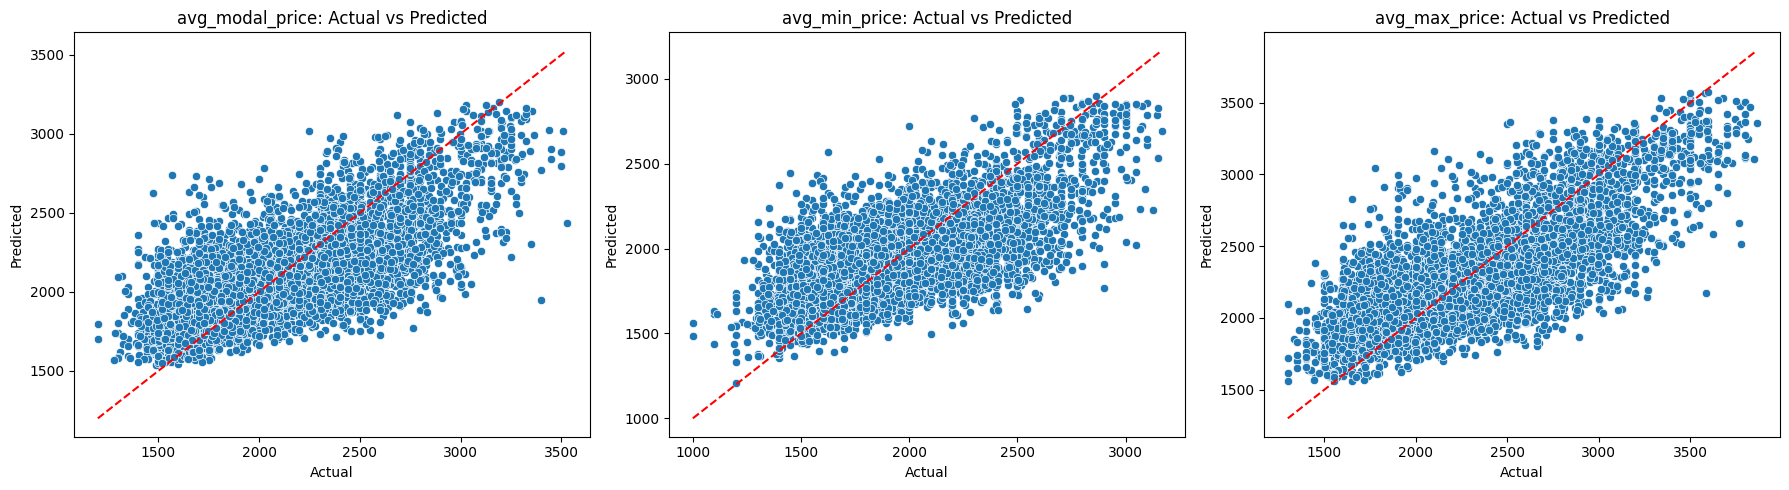

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions to a DataFrame for easier handling, matching columns in y_test
pred_df = pd.DataFrame(predictions, columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], index=y_test.index)

# Create subplots for each target variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

for i, col in enumerate(target_cols):
    # Scatter plot for actual vs predicted
    sns.scatterplot(x=y_test[col], y=pred_df[col], ax=axes[i])
    # Plot the ideal prediction line
    min_val = min(y_test[col].min(), pred_df[col].min())
    max_val = max(y_test[col].max(), pred_df[col].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')
    
    axes[i].set_title(f'{col}: Actual vs Predicted')
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


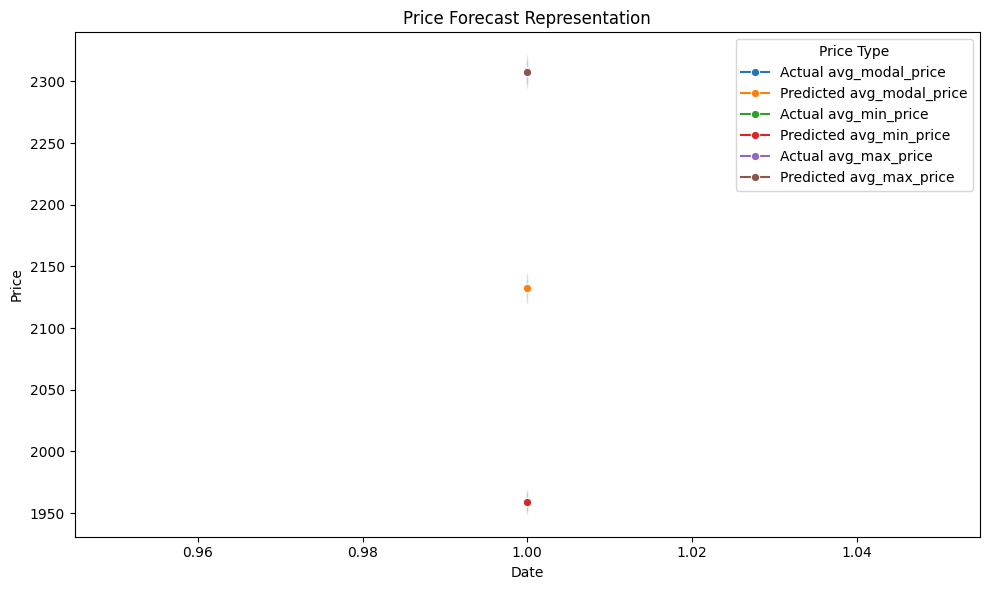

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your X_test has a 'date' column:
# 1. Sort by date (optional but often helpful)
X_test_sorted = X_test.sort_values(by='day')
y_test_sorted = y_test.loc[X_test_sorted.index]

# Convert predictions array into a DataFrame matching y_test columns
pred_df = pd.DataFrame(
    predictions, 
    columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], 
    index=X_test_sorted.index
)

# 2. Combine into one DataFrame for plotting
df_plot = X_test_sorted[['day']].copy()
df_plot['Actual avg_modal_price']   = y_test_sorted['avg_modal_price']
df_plot['Predicted avg_modal_price'] = pred_df['avg_modal_price']
df_plot['Actual avg_min_price']     = y_test_sorted['avg_min_price']
df_plot['Predicted avg_min_price']   = pred_df['avg_min_price']
df_plot['Actual avg_max_price']     = y_test_sorted['avg_max_price']
df_plot['Predicted avg_max_price']   = pred_df['avg_max_price']

# 3. Melt the DataFrame so we can plot by hue
df_melted = df_plot.melt(id_vars='day', var_name='Price_Type', value_name='Price')

# 4. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='day', y='Price', hue='Price_Type', marker='o')
plt.title('Price Forecast Representation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()


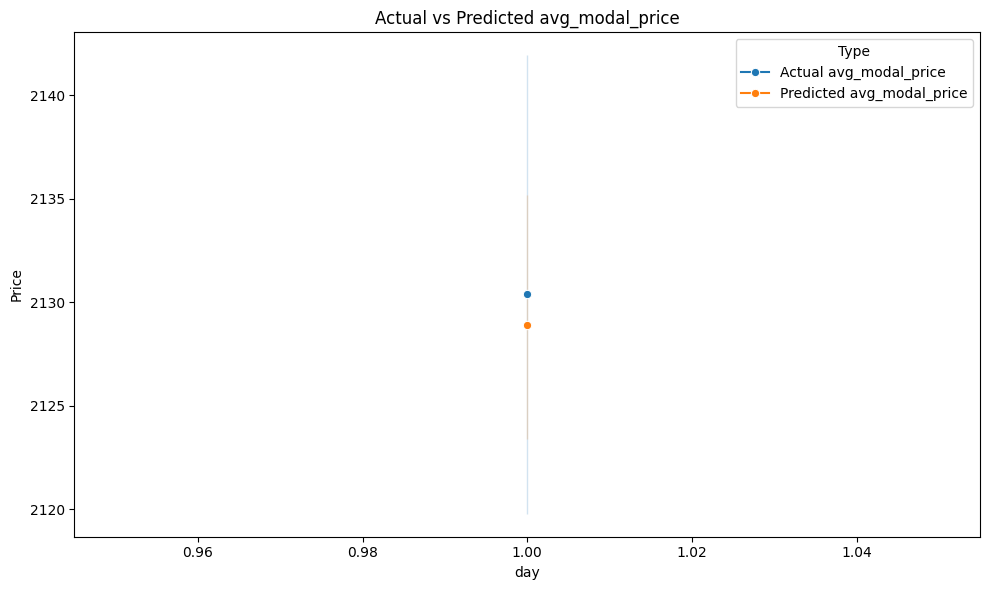

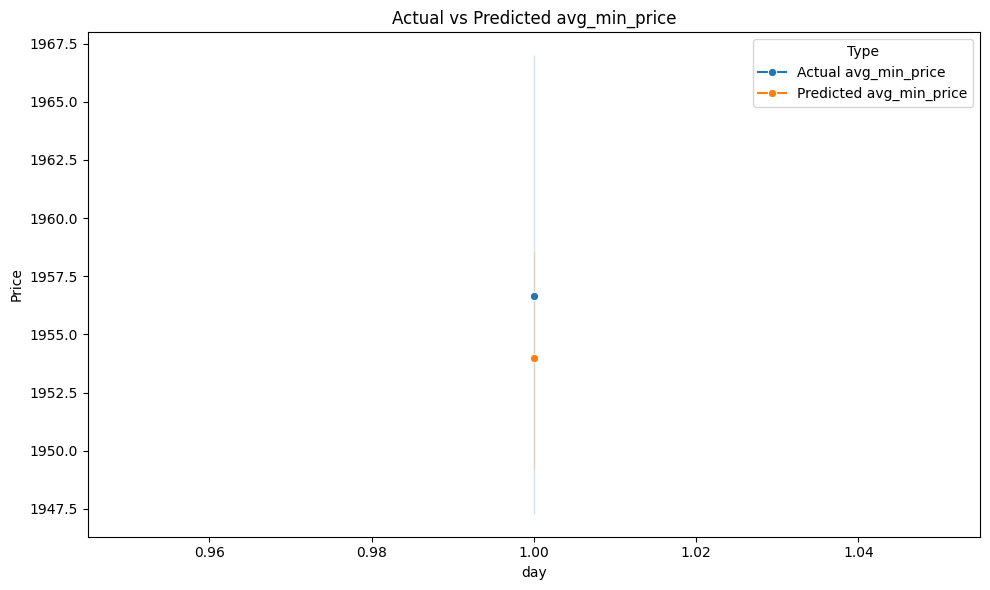

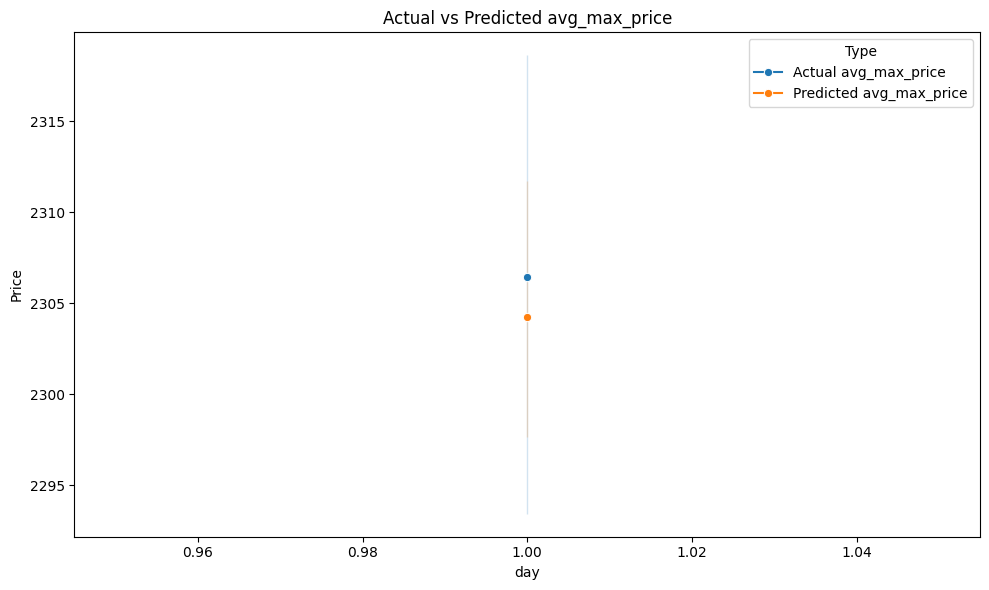

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test has a 'date' column
X_test_sorted = X_test.sort_values(by='day')
y_test_sorted = y_test.loc[X_test_sorted.index]

# Convert predictions array into a DataFrame matching y_test columns
pred_df = pd.DataFrame(
    predictions, 
    columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], 
    index=X_test_sorted.index
)

# List of target columns
price_columns = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

# Loop through each column to create separate plots
for col in price_columns:
    plt.figure(figsize=(10, 6))
    
    # Prepare a DataFrame with date, actual, and predicted values
    df_plot = pd.DataFrame({
        'day': X_test_sorted['day'],
        f'Actual {col}': y_test_sorted[col],
        f'Predicted {col}': pred_df[col]
    })
    
    # Melt the DataFrame for easier plotting with seaborn
    df_melted = df_plot.melt(id_vars='day', var_name='Type', value_name='Price')
    
    # Plot with different color schemes and markers
    sns.lineplot(data=df_melted, x='day', y='Price', hue='Type', marker='o')
    
    plt.title(f'Actual vs Predicted {col}')
    plt.xlabel('day')
    plt.ylabel('Price')
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()


save_model

In [30]:
import pickle

# Save the best_model to a file
with open('wheat_model_proto_20_23.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as wheat_model_proto.pkl")


Model saved as wheat_model_proto.pkl


Streamlit app 1

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
# Uncomment the next two lines if loading the model from a pickle file:
import pickle
best_model = pickle.load(open('wheat_model_proto.pkl', 'rb'))

# If the model is already defined in this context:
# from your_model_module import best_model

st.title("Price Prediction App")

st.write("Enter the following details to predict prices:")

# Input widgets
month = st.number_input("Month", min_value=1, max_value=12, value=1)
year = st.number_input("Year", min_value=2000, max_value=2100, value=2020)
day = st.number_input("Day", min_value=1, max_value=31, value=1)
district_name_enc = st.number_input("District Encoding", value=0)
commodity_name_enc = st.number_input("Commodity Encoding", value=0)
state_name_enc = st.number_input("State Encoding", value=0)

if st.button("Predict"):
    # Create input as a 2D array (model expects multiple samples)
    input_data = np.array([[month, year, day, district_name_enc, commodity_name_enc, state_name_enc]])
    
    # Make prediction using the trained model
    predictions = best_model.predict(input_data)
    
    # Extract predicted values for each target
    pred_modal, pred_min, pred_max = predictions[0]
    
    st.subheader("Predicted Prices")
    st.write(f"**Average Modal Price:** {pred_modal:.2f}")
    st.write(f"**Average Min Price:** {pred_min:.2f}")
    st.write(f"**Average Max Price:** {pred_max:.2f}")


Streamlit app 2 with pipeline

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from datetime import date
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# -------------------------------
# Custom transformer for preprocessing
# -------------------------------
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, freq_mapping_district=None, freq_mapping_commodity=None, freq_mapping_state=None):
        self.freq_mapping_district = freq_mapping_district
        self.freq_mapping_commodity = freq_mapping_commodity
        self.freq_mapping_state = freq_mapping_state

    def fit(self, X, y=None):
        # Compute frequency mappings if not provided
        if self.freq_mapping_district is None:
            self.freq_mapping_district = X['district_name'].value_counts().to_dict()
        if self.freq_mapping_commodity is None:
            self.freq_mapping_commodity = X['commodity_name'].value_counts().to_dict()
        if self.freq_mapping_state is None:
            self.freq_mapping_state = X['state_name'].value_counts().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        # Convert the date column to datetime and extract day, month, year
        X['date'] = pd.to_datetime(X['date'])
        X['day'] = X['date'].dt.day
        X['month'] = X['date'].dt.month
        X['year'] = X['date'].dt.year
        X.drop('date', axis=1, inplace=True)
        # Frequency encoding for the categorical columns
        X['district_name_enc'] = X['district_name'].map(self.freq_mapping_district)
        X['commodity_name_enc'] = X['commodity_name'].map(self.freq_mapping_commodity)
        X['state_name_enc'] = X['state_name'].map(self.freq_mapping_state)
        X.drop(['district_name', 'commodity_name', 'state_name'], axis=1, inplace=True)
        # Return columns in the order expected by the model
        return X[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]

# -------------------------------
# Load the trained model
# -------------------------------
# Make sure you have saved your model as best_model.pkl using pickle
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# -------------------------------
# Create a pipeline combining preprocessing and prediction
# -------------------------------
pipeline = Pipeline([
    ('preprocessor', DataPreprocessor()),
    ('model', best_model)
])

# -------------------------------
# Streamlit App UI
# -------------------------------
st.title("Price Prediction App")

st.write("Enter the following details to predict the prices:")

# User inputs:
input_date = st.date_input("Select Date", date.today())
district_name = st.text_input("District Name", value="Enter district name")
commodity_name = st.text_input("Commodity Name", value="Enter commodity name")
state_name = st.text_input("State Name", value="Enter state name")

if st.button("Predict"):
    # Create a DataFrame with a single row of raw input
    input_df = pd.DataFrame({
        'date': [input_date],
        'district_name': [district_name],
        'commodity_name': [commodity_name],
        'state_name': [state_name]
    })
    
    # Run the pipeline to process inputs and generate prediction
    prediction = pipeline.predict(input_df)
    # prediction is an array with three outputs: [avg_modal_price, avg_min_price, avg_max_price]
    pred_modal, pred_min, pred_max = prediction[0]
    
    st.subheader("Predicted Prices")
    st.write(f"**Average Modal Price:** {pred_modal:.2f}")
    st.write(f"**Average Min Price:** {pred_min:.2f}")
    st.write(f"**Average Max Price:** {pred_max:.2f}")


## prophet for forcasting

In [ ]:
df = pd.read_csv('edited_training_data.csv')

In [ ]:
df.dropna()

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Filter data for a specific state, district, and commodity
group_df = df[
    (df['state_name'] == 30501) &
    (df['district_name'] == 981) &
    (df['commodity_name'] == 30501)
].copy()

# Check if the filtered DataFrame is empty
if group_df.empty:
    print("No data available for the specified state, district, and commodity.")
else:
    # Prepare data for Prophet (using avg_modal_price as target)
    group_df = group_df[['date', 'avg_modal_price']].rename(columns={'date': 'ds', 'avg_modal_price': 'y'})
    group_df['ds'] = pd.to_datetime(group_df['ds'])

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(group_df)

    # Create a DataFrame to hold predictions for the next 30 days (or adjust as needed)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot forecast
    fig = model.plot(forecast)
    plt.title("Prophet Forecast for avg_modal_price")
    plt.show()
